## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import os
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder, Normalizer, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_columns = None

## Import and Analyze Dataframe

In [2]:
data = pd.read_csv('./Data/fifa21_male2.csv')

In [3]:
#Check overall columns and info in dataframe
data.head()

,ID,Name,Age,OVA,Nationality,Club,BOV,BP,Position,Player Photo,Club Logo,Flag Photo,POT,Team & Contract,Height,Weight,foot,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Contract,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,Gender
0,2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,https://cdn.sofifa.com/teams/55/light_60.png,https://cdn.sofifa.com/flags/it.png,69,Udinese 2008 ~ 2016,"6'0""",181lbs,Left,0,"Jul 1, 2008",NaN,€625K,€7K,€0,2008 ~ 2016,313,75,50,59,71,58.0,338,73,65.0,60,69,71,347,68,74,68.0,69,68.0,347,74,68.0,69,68,68,320,72,69.0,63.0,66.0,50,NaN,208,70,69,69.0,56,14,5,15,10,12,1929,408,3 ★,2★,Medium,High,2 ★,71,59,70,71,68,69,4,65+0,65+0,65+0,68+0,67+0,67+0,67+0,68+0,68+0,68+0,68+0,69+0,69+0,69+0,69+0,69+0,71+-2,70+-1,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male
1,16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,https://cdn.sofifa.com/teams/2013/light_60.png,https://cdn.sofifa.com/flags/es.png,71,KAS Eupen 2014 ~ 2019,"5'10""",143lbs,Right,0,"Jul 19, 2014",NaN,€600K,€7K,€1.1M,2014 ~ 2019,337,68,64,61,76,68.0,369,69,79.0,79,71,71,305,56,50,62.0,65,72.0,324,75,54.0,64,60,71,362,71,71.0,72.0,73.0,75,79.0,153,70,43,40.0,56,9,12,13,11,11,1906,385,4 ★,3★,Medium,Medium,1 ★,53,69,73,69,58,63,4,67+1,67+1,67+1,67+0,68+0,68+0,68+0,67+0,70+1,70+1,70+1,68+1,70+1,70+1,70+1,68+1,62+1,66+1,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male
2,27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,https://cdn.sofifa.com/teams/1800/light_60.png,https://cdn.sofifa.com/flags/gb-eng.png,71,Coventry City 2016 ~ 2020,"5'9""",161lbs,Right,0,"Jan 7, 2016",NaN,€1.1M,€15K,€0,2016 ~ 2020,337,80,64,41,77,75.0,387,79,84.0,77,69,78,295,48,42,71.0,59,75.0,284,72,58.0,29,56,69,317,69,39.0,69.0,74.0,66,NaN,99,35,34,30.0,51,9,6,13,16,7,1770,354,4 ★,4★,Medium,Low,2 ★,45,68,76,77,36,52,11,64+0,64+0,64+0,70+0,69+0,69+0,69+0,70+0,71+0,71+0,71+0,68+0,66+0,66+0,66+0,68+0,52+0,54+0,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male
3,36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,NaN,https://cdn.sofifa.com/players/000/036/09_120.png,https://cdn.sofifa.com/teams/106/light_60.png,https://cdn.sofifa.com/flags/tt.png,82,Sunderland 2009,"5'11""",165lbs,Right,14,NaN,NaN,€0,€0,€0,2009,264,54,70,60,80,NaN,255,68,NaN,46,64,77,176,59,62,NaN,55,NaN,239,63,NaN,51,66,59,271,59,70.0,72.0,NaN,70,NaN,75,34,41,NaN,68,5,21,64,21,21,1348,369,3 ★,1★,NaN,NaN,1 ★,61,66,66,69,47,60,3,67+0,67+0,67+0,66+0,67+0,67+0,67+0,66+0,70+0,70+0,70+0,66+0,68+0,68+0,68+0,66+0,56+0,65+0,65+0,65+0,56+0,57+0,51+0,51+0,51+0,57+0,22+0,Male
4,41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,https://cdn.sofifa.com/teams/101146/light_60.png,https://cdn.sofifa.com/flags/es.png,81,Vissel Kobe 2018 ~ 2021,"5'7""",150lbs,Right,0,"Jul 16, 2018",NaN,€5.5M,€12K,€7.2M,2018 ~ 2021,367,75,69,54,90,79.0,408,85,80.0,70,83,90,346,61,56,79.0,75,75.0,297,67,40.0,58,62,70,370,58,70.0,78.0,93.0,71,89.0,181,68,57,56.0,45,6,13,6,13,7,2014,420,4 ★,4★,High,Medium,4 ★,58,70,85,85,63,59,149,72+3,72+3,72+3,79+0,79+0,79+0,79+0,79+0,82+-1,82+-1,82+-1,79+2,81+0,81+0,81+0,79+2,70+3,73+3,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3,Male


In [4]:
# Standardize column names
data.columns = data.columns = data.columns.str.lower().str.replace(" ", "_")

In [5]:
data.drop_duplicates()

,id,name,age,ova,nationality,club,bov,bp,position,player_photo,club_logo,flag_photo,pot,team_&_contract,height,weight,foot,growth,joined,loan_date_end,value,wage,release_clause,contract,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,gender
0,2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,https://cdn.sofifa.com/teams/55/light_60.png,https://cdn.sofifa.com/flags/it.png,69,Udinese 2008 ~ 2016,"6'0""",181lbs,Left,0,"Jul 1, 2008",NaN,€625K,€7K,€0,2008 ~ 2016,313,75,50,59,71,58.0,338,73,65.0,60,69,71,347,68,74,68.0,69,68.0,347,74,68.0,69,68,68,320,72,69.0,63.0,66.0,50,NaN,208,70,69,69.0,56,14,5,15,10,12,1929,408,3 ★,2★,Medium,High,2 ★,71,59,70,71,68,69,4,65+0,65+0,65+0,68+0,67+0,67+0,67+0,68+0,68+0,68+0,68+0,69+0,69+0,69+0,69+0,69+0,71+-2,70+-1,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male
1,16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,https://cdn.sofifa.com/teams/2013/light_60.png,https://cdn.sofifa.com/flags/es.png,71,KAS Eupen 2014 ~ 2019,"5'10""",143lbs,Right,0,"Jul 19, 2014",NaN,€600K,€7K,€1.1M,2014 ~ 2019,337,68,64,61,76,68.0,369,69,79.0,79,71,71,305,56,50,62.0,65,72.0,324,75,54.0,64,60,71,362,71,71.0,72.0,73.0,75,79.0,153,70,43,40.0,56,9,12,13,11,11,1906,385,4 ★,3★,Medium,Medium,1 ★,53,69,73,69,58,63,4,67+1,67+1,67+1,67+0,68+0,68+0,68+0,67+0,70+1,70+1,70+1,68+1,70+1,70+1,70+1,68+1,62+1,66+1,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male
2,27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,https://cdn.sofifa.com/teams/1800/light_60.png,https://cdn.sofifa.com/flags/gb-eng.png,71,Coventry City 2016 ~ 2020,"5'9""",161lbs,Right,0,"Jan 7, 2016",NaN,€1.1M,€15K,€0,2016 ~ 2020,337,80,64,41,77,75.0,387,79,84.0,77,69,78,295,48,42,71.0,59,75.0,284,72,58.0,29,56,69,317,69,39.0,69.0,74.0,66,NaN,99,35,34,30.0,51,9,6,13,16,7,1770,354,4 ★,4★,Medium,Low,2 ★,45,68,76,77,36,52,11,64+0,64+0,64+0,70+0,69+0,69+0,69+0,70+0,71+0,71+0,71+0,68+0,66+0,66+0,66+0,68+0,52+0,54+0,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male
3,36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,NaN,https://cdn.sofifa.com/players/000/036/09_120.png,https://cdn.sofifa.com/teams/106/light_60.png,https://cdn.sofifa.com/flags/tt.png,82,Sunderland 2009,"5'11""",165lbs,Right,14,NaN,NaN,€0,€0,€0,2009,264,54,70,60,80,NaN,255,68,NaN,46,64,77,176,59,62,NaN,55,NaN,239,63,NaN,51,66,59,271,59,70.0,72.0,NaN,70,NaN,75,34,41,NaN,68,5,21,64,21,21,1348,369,3 ★,1★,NaN,NaN,1 ★,61,66,66,69,47,60,3,67+0,67+0,67+0,66+0,67+0,67+0,67+0,66+0,70+0,70+0,70+0,66+0,68+0,68+0,68+0,66+0,56+0,65+0,65+0,65+0,56+0,57+0,51+0,51+0,51+0,57+0,22+0,Male
4,41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,https://cdn.sofifa.com/teams/101146/light_60.png,https://cdn.sofifa.com/flags/es.png,81,Vissel Kobe 2018 ~ 2021,"5'7""",150lbs,Right,0,"Jul 16, 2018",NaN,€5.5M,€12K,€7.2M,2018 ~ 2021,367,75,69,54,90,79.0,408,85,80.0,70,83,90,346,61,56,79.0,75,75.0,297,67,40.0,58,62,70,370,58,70.0,78.0,93.0,71,89.0,181,68,57,56.0,45,6,13,6,13,7,2014,420,4 ★,4★,High,Medium,4 ★,58,70,85,85,63,59,149,72+3,72+3,72+3,79+0,79+0,79+0,79+0,79+0,82+-1,82+-1,82+-1,79+2,81+0,81+0,81+0,79+2,70+3,73+3,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

## Check null values

In [6]:
#Check if there are null values
data.isnull().any().any()


True

In [7]:
# Check where are the null values
nulls = data.isnull().sum().to_frame()
for index, row in nulls.iterrows():
    if row[0]!=0:
        print(index, row[0])

club 23
position 413
club_logo 23
joined 58
loan_date_end 16215
volleys 58
curve 58
agility 58
balance 58
jumping 58
interceptions 7
positioning 7
vision 58
composure 423
sliding_tackle 58
a/w 89
d/w 89


### Dealing with higher null columns: 'Position', 'Loan_date_end' and 'composure'

In [8]:
#Position: Deleting 'position' as 'BP=best position' gives the similar and even more relevant data for the model
data = data.drop(['position'], axis = 1)

#Loan_date_end: Deleting this column as most values are null (16k out of 17k)
data = data.drop(['loan_date_end'], axis = 1)
data

#composure: I will fill with the median
c_mean = data['composure'].mean()
data['composure'] = data['composure'].fillna(c_mean)

## Droping unnecessary columns for better modeling

In [9]:
#Drop the columns that I are not relevant for the model: 'id','name','nationality','player_photo','club_logo','flag_photo'
data = data.drop(['id','name','nationality','player_photo','club_logo','joined','foot','w/f','flag_photo','a/w','d/w','team_&_contract','sm','club','hits','contract'], axis = 1)

#As BP is the position where the player will be valued by the market, I will delete the performance in all positions
data = data.drop(['ls','ir','st','rs','lw','lf','cf','rf','rw','lam','cam','ram','lm','lcm','cm','rcm','rm','lwb','ldm','cdm','rdm','rwb','lb','lcb','cb','rcb','rb','gk'], axis = 1)

### Gender column: Delete as always is 'male'

In [10]:
data.gender.unique()

array(['Male'], dtype=object)

In [11]:
#I will drop gender as all are males
data = data.drop(['gender'], axis = 1)
data

,age,ova,bov,bp,pot,height,weight,growth,value,wage,release_clause,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,pac,sho,pas,dri,def,phy
0,33,69,71,LWB,69,"6'0""",181lbs,0,€625K,€7K,€0,313,75,50,59,71,58.0,338,73,65.0,60,69,71,347,68,74,68.0,69,68.0,347,74,68.0,69,68,68,320,72,69.0,63.0,66.0,50,59.940965,208,70,69,69.0,56,14,5,15,10,12,1929,408,71,59,70,71,68,69
1,37,71,70,CM,71,"5'10""",143lbs,0,€600K,€7K,€1.1M,337,68,64,61,76,68.0,369,69,79.0,79,71,71,305,56,50,62.0,65,72.0,324,75,54.0,64,60,71,362,71,71.0,72.0,73.0,75,79.000000,153,70,43,40.0,56,9,12,13,11,11,1906,385,53,69,73,69,58,63
2,33,71,71,CAM,71,"5'9""",161lbs,0,€1.1M,€15K,€0,337,80,64,41,77,75.0,387,79,84.0,77,69,78,295,48,42,71.0,59,75.0,284,72,58.0,29,56,69,317,69,39.0,69.0,74.0,66,59.940965,99,35,34,30.0,51,9,6,13,16,7,1770,354,45,68,76,77,36,52
3,36,68,70,ST,82,"5'11""",165lbs,14,€0,€0,€0,264,54,70,60,80,NaN,255,68,NaN,46,64,77,176,59,62,NaN,55,NaN,239,63,NaN,51,66,59,271,59,70.0,72.0,NaN,70,59.940965,75,34,41,NaN,68,5,21,64,21,21,1348,369,61,66,66,69,47,60
4,36,81,82,CAM,81,"5'7""",150lbs,0,€5.5M,€12K,€7.2M,367,75,69,54,90,79.0,408,85,80.0,70,83,90,346,61,56,79.0,75,75.0,297,67,40.0,58,62,70,370,58,70.0,78.0,93.0,71,89.000000,181,68,57,56.0,45,6,13,6,13,7,2014,420,58,70,85,85,63,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17120,22,64,66,CB,69,"6'6""",165lbs,5,€550K,€2K,€0,197,35,23,66,47,26.0,193,44,26.0,33,34,56,243,52,55,46.0,48,42.0,279,48,70.0,59,74,28,218,69,58.0,23.0,29.0,39,46.000000,198,61,71,66.0,39,11,8,8,5,7,1367,302,54,30,37,48,64,69
17121,18,56,58,CAM,66,"5'10""",170lbs,10,€130K,€3K,€273K,248,50,43,50,64,41.0,264,57,42.0,50,61,54,298,61,63,52.0,54,68.0,271,51,62.0,53,57,48,259,51,50.0,55.0,53.0,50,46.000000,132,34,42,56.0,57,12,15,7,12,11,1529,319,62,46,57,56,43,55
17122,18,56,56,RB,67,"5'9""",154lbs,11,€130K,€2K,€273K,218,55,34,53,42,34.0,212,52,43.0,34,36,47,308,66,61,54.0,59,68.0,233,28,61.0,53,54,37,256,58,55.0,49.0,45.0,49,43.000000,163,55,54,54.0,40,8,7,5,12,8,1430,303,63,35,44,52,54,55
17123,20,62,62,RB,73,"5'9""",148lbs,11,€475K,€3K,€784K,223,62,26,52,60,23.0,258,55,43.0,46,57,57,349,72,70,74.0,56,77.0,261,51,72.0,57,48,33,257,61,58.0,46.0,56.0,36,54.000000,180,57,62,61.0,51,15,13,8,6,9,1579,335,71,34,58,59,59,54


### Below columns: Fill the null values with their means

In [12]:
data['volleys'] = data['volleys'].fillna(data['volleys'].mean())
data['curve'] = data['curve'].fillna(data['curve'].mean())
data['agility'] = data['agility'].fillna(data['agility'].mean())
data['balance'] = data['balance'].fillna(data['balance'].mean())
data['jumping'] = data['jumping'].fillna(data['jumping'].mean())
data['interceptions'] = data['interceptions'].fillna(data['interceptions'].mean())
data['positioning'] = data['positioning'].fillna(data['positioning'].mean())
data['vision'] = data['vision'].fillna(data['vision'].mean())
data['sliding_tackle'] = data['sliding_tackle'].fillna(data['sliding_tackle'].mean())

### Check not more nulls in the dataframe

In [13]:
#Check there are not null values 
data.isnull().any().any()

False

In [14]:
data

,age,ova,bov,bp,pot,height,weight,growth,value,wage,release_clause,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,pac,sho,pas,dri,def,phy
0,33,69,71,LWB,69,"6'0""",181lbs,0,€625K,€7K,€0,313,75,50,59,71,58.000000,338,73,65.000000,60,69,71,347,68,74,68.000000,69,68.000000,347,74,68.000000,69,68,68,320,72,69.0,63.0,66.000000,50,59.940965,208,70,69,69.000000,56,14,5,15,10,12,1929,408,71,59,70,71,68,69
1,37,71,70,CM,71,"5'10""",143lbs,0,€600K,€7K,€1.1M,337,68,64,61,76,68.000000,369,69,79.000000,79,71,71,305,56,50,62.000000,65,72.000000,324,75,54.000000,64,60,71,362,71,71.0,72.0,73.000000,75,79.000000,153,70,43,40.000000,56,9,12,13,11,11,1906,385,53,69,73,69,58,63
2,33,71,71,CAM,71,"5'9""",161lbs,0,€1.1M,€15K,€0,337,80,64,41,77,75.000000,387,79,84.000000,77,69,78,295,48,42,71.000000,59,75.000000,284,72,58.000000,29,56,69,317,69,39.0,69.0,74.000000,66,59.940965,99,35,34,30.000000,51,9,6,13,16,7,1770,354,45,68,76,77,36,52
3,36,68,70,ST,82,"5'11""",165lbs,14,€0,€0,€0,264,54,70,60,80,45.005742,255,68,49.574676,46,64,77,176,59,62,64.602273,55,64.715591,239,63,65.170212,51,66,59,271,59,70.0,72.0,55.443605,70,59.940965,75,34,41,46.099725,68,5,21,64,21,21,1348,369,61,66,66,69,47,60
4,36,81,82,CAM,81,"5'7""",150lbs,0,€5.5M,€12K,€7.2M,367,75,69,54,90,79.000000,408,85,80.000000,70,83,90,346,61,56,79.000000,75,75.000000,297,67,40.000000,58,62,70,370,58,70.0,78.0,93.000000,71,89.000000,181,68,57,56.000000,45,6,13,6,13,7,2014,420,58,70,85,85,63,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17120,22,64,66,CB,69,"6'6""",165lbs,5,€550K,€2K,€0,197,35,23,66,47,26.000000,193,44,26.000000,33,34,56,243,52,55,46.000000,48,42.000000,279,48,70.000000,59,74,28,218,69,58.0,23.0,29.000000,39,46.000000,198,61,71,66.000000,39,11,8,8,5,7,1367,302,54,30,37,48,64,69
17121,18,56,58,CAM,66,"5'10""",170lbs,10,€130K,€3K,€273K,248,50,43,50,64,41.000000,264,57,42.000000,50,61,54,298,61,63,52.000000,54,68.000000,271,51,62.000000,53,57,48,259,51,50.0,55.0,53.000000,50,46.000000,132,34,42,56.000000,57,12,15,7,12,11,1529,319,62,46,57,56,43,55
17122,18,56,56,RB,67,"5'9""",154lbs,11,€130K,€2K,€273K,218,55,34,53,42,34.000000,212,52,43.000000,34,36,47,308,66,61,54.000000,59,68.000000,233,28,61.000000,53,54,37,256,58,55.0,49.0,45.000000,49,43.000000,163,55,54,54.000000,40,8,7,5,12,8,1430,303,63,35,44,52,54,55
17123,20,62,62,RB,73,"5'9""",148lbs,11,€475K,€3K,€784K,223,62,26,52,60,23.000000,258,55,43.000000,46,57,57,349,72,70,74.000000,56,77.000000,261,51,72.000000,57,48,33,257,61,58.0,46.0,56.000000,36,54.000000,180,57,62,61.000000,51,15,13,8,6,9,1579,335,71,34,58,59,59,54


In [15]:
data.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17125 entries, 0 to 17124
Data columns (total 60 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               17125 non-null  int64  
 1   ova               17125 non-null  int64  
 2   bov               17125 non-null  int64  
 3   bp                17125 non-null  object 
 4   pot               17125 non-null  int64  
 5   height            17125 non-null  object 
 6   weight            17125 non-null  object 
 7   growth            17125 non-null  int64  
 8   value             17125 non-null  object 
 9   wage              17125 non-null  object 
 10  release_clause    17125 non-null  object 
 11  attacking         17125 non-null  int64  
 12  crossing          17125 non-null  int64  
 13  finishing         17125 non-null  int64  
 14  heading_accuracy  17125 non-null  int64  
 15  short_passing     17125 non-null  int64  
 16  volleys           17125 non-null  float6

## Check the categorical columns that we have 

In [16]:
data.select_dtypes(include=['object']) #As we see, bp column is the only real categorical

,bp,height,weight,value,wage,release_clause
0,LWB,"6'0""",181lbs,€625K,€7K,€0
1,CM,"5'10""",143lbs,€600K,€7K,€1.1M
2,CAM,"5'9""",161lbs,€1.1M,€15K,€0
3,ST,"5'11""",165lbs,€0,€0,€0
4,CAM,"5'7""",150lbs,€5.5M,€12K,€7.2M
...,...,...,...,...,...,...
17120,CB,"6'6""",165lbs,€550K,€2K,€0
17121,CAM,"5'10""",170lbs,€130K,€3K,€273K
17122,RB,"5'9""",154lbs,€130K,€2K,€273K
17123,RB,"5'9""",148lbs,€475K,€3K,€784K


## Next step: Change the categorical columns to numerical (by cleaning 1)symbols, 1)weight and 3)currencies)

In [17]:
#Delete lbs from 'weight', and similar operations
data['weight']= [column.replace('lbs','')for column in data['weight']]
data['value']= [column.replace('€','')for column in data['value']] 
data['value']= [column.replace('M','000000')for column in data['value']]
data['value']= [column.replace('K','000')for column in data['value']]
data['wage']= [column.replace('€','')for column in data['wage']] 
data['wage']= [column.replace('K','000')for column in data['wage']]
data['release_clause']= [column.replace('€','')for column in data['release_clause']] 
data['release_clause']= [column.replace('K','000')for column in data['release_clause']]
data['release_clause']= [column.replace('M','000000')for column in data['release_clause']]

data["height"] = data["height"].str.replace('"',"")
data["height"] = data["height"].str.replace("'",".")

#Change to numeric data
data['weight'] = pd.to_numeric(data['weight'])
data['value'] = pd.to_numeric(data['value'])
data['wage'] = pd.to_numeric(data['wage'])
data['release_clause'] = pd.to_numeric(data['release_clause'])
data['height'] = pd.to_numeric(data['height'])

In [18]:
data.info() # now we have a df with all corrected type and values in columns to proceed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17125 entries, 0 to 17124
Data columns (total 60 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               17125 non-null  int64  
 1   ova               17125 non-null  int64  
 2   bov               17125 non-null  int64  
 3   bp                17125 non-null  object 
 4   pot               17125 non-null  int64  
 5   height            17125 non-null  float64
 6   weight            17125 non-null  int64  
 7   growth            17125 non-null  int64  
 8   value             17125 non-null  float64
 9   wage              17125 non-null  int64  
 10  release_clause    17125 non-null  float64
 11  attacking         17125 non-null  int64  
 12  crossing          17125 non-null  int64  
 13  finishing         17125 non-null  int64  
 14  heading_accuracy  17125 non-null  int64  
 15  short_passing     17125 non-null  int64  
 16  volleys           17125 non-null  float6

## Final dataframe for correlation 

In [19]:
data

,age,ova,bov,bp,pot,height,weight,growth,value,wage,release_clause,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,pac,sho,pas,dri,def,phy
0,33,69,71,LWB,69,6.00,181,0,625000.0,7000,0.0,313,75,50,59,71,58.000000,338,73,65.000000,60,69,71,347,68,74,68.000000,69,68.000000,347,74,68.000000,69,68,68,320,72,69.0,63.0,66.000000,50,59.940965,208,70,69,69.000000,56,14,5,15,10,12,1929,408,71,59,70,71,68,69
1,37,71,70,CM,71,5.10,143,0,600000.0,7000,1.1,337,68,64,61,76,68.000000,369,69,79.000000,79,71,71,305,56,50,62.000000,65,72.000000,324,75,54.000000,64,60,71,362,71,71.0,72.0,73.000000,75,79.000000,153,70,43,40.000000,56,9,12,13,11,11,1906,385,53,69,73,69,58,63
2,33,71,71,CAM,71,5.90,161,0,1.1,15000,0.0,337,80,64,41,77,75.000000,387,79,84.000000,77,69,78,295,48,42,71.000000,59,75.000000,284,72,58.000000,29,56,69,317,69,39.0,69.0,74.000000,66,59.940965,99,35,34,30.000000,51,9,6,13,16,7,1770,354,45,68,76,77,36,52
3,36,68,70,ST,82,5.11,165,14,0.0,0,0.0,264,54,70,60,80,45.005742,255,68,49.574676,46,64,77,176,59,62,64.602273,55,64.715591,239,63,65.170212,51,66,59,271,59,70.0,72.0,55.443605,70,59.940965,75,34,41,46.099725,68,5,21,64,21,21,1348,369,61,66,66,69,47,60
4,36,81,82,CAM,81,5.70,150,0,5.5,12000,7.2,367,75,69,54,90,79.000000,408,85,80.000000,70,83,90,346,61,56,79.000000,75,75.000000,297,67,40.000000,58,62,70,370,58,70.0,78.0,93.000000,71,89.000000,181,68,57,56.000000,45,6,13,6,13,7,2014,420,58,70,85,85,63,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17120,22,64,66,CB,69,6.60,165,5,550000.0,2000,0.0,197,35,23,66,47,26.000000,193,44,26.000000,33,34,56,243,52,55,46.000000,48,42.000000,279,48,70.000000,59,74,28,218,69,58.0,23.0,29.000000,39,46.000000,198,61,71,66.000000,39,11,8,8,5,7,1367,302,54,30,37,48,64,69
17121,18,56,58,CAM,66,5.10,170,10,130000.0,3000,273000.0,248,50,43,50,64,41.000000,264,57,42.000000,50,61,54,298,61,63,52.000000,54,68.000000,271,51,62.000000,53,57,48,259,51,50.0,55.0,53.000000,50,46.000000,132,34,42,56.000000,57,12,15,7,12,11,1529,319,62,46,57,56,43,55
17122,18,56,56,RB,67,5.90,154,11,130000.0,2000,273000.0,218,55,34,53,42,34.000000,212,52,43.000000,34,36,47,308,66,61,54.000000,59,68.000000,233,28,61.000000,53,54,37,256,58,55.0,49.0,45.000000,49,43.000000,163,55,54,54.000000,40,8,7,5,12,8,1430,303,63,35,44,52,54,55
17123,20,62,62,RB,73,5.90,148,11,475000.0,3000,784000.0,223,62,26,52,60,23.000000,258,55,43.000000,46,57,57,349,72,70,74.000000,56,77.000000,261,51,72.000000,57,48,33,257,61,58.0,46.0,56.000000,36,54.000000,180,57,62,61.000000,51,15,13,8,6,9,1579,335,71,34,58,59,59,54


## Correlation 

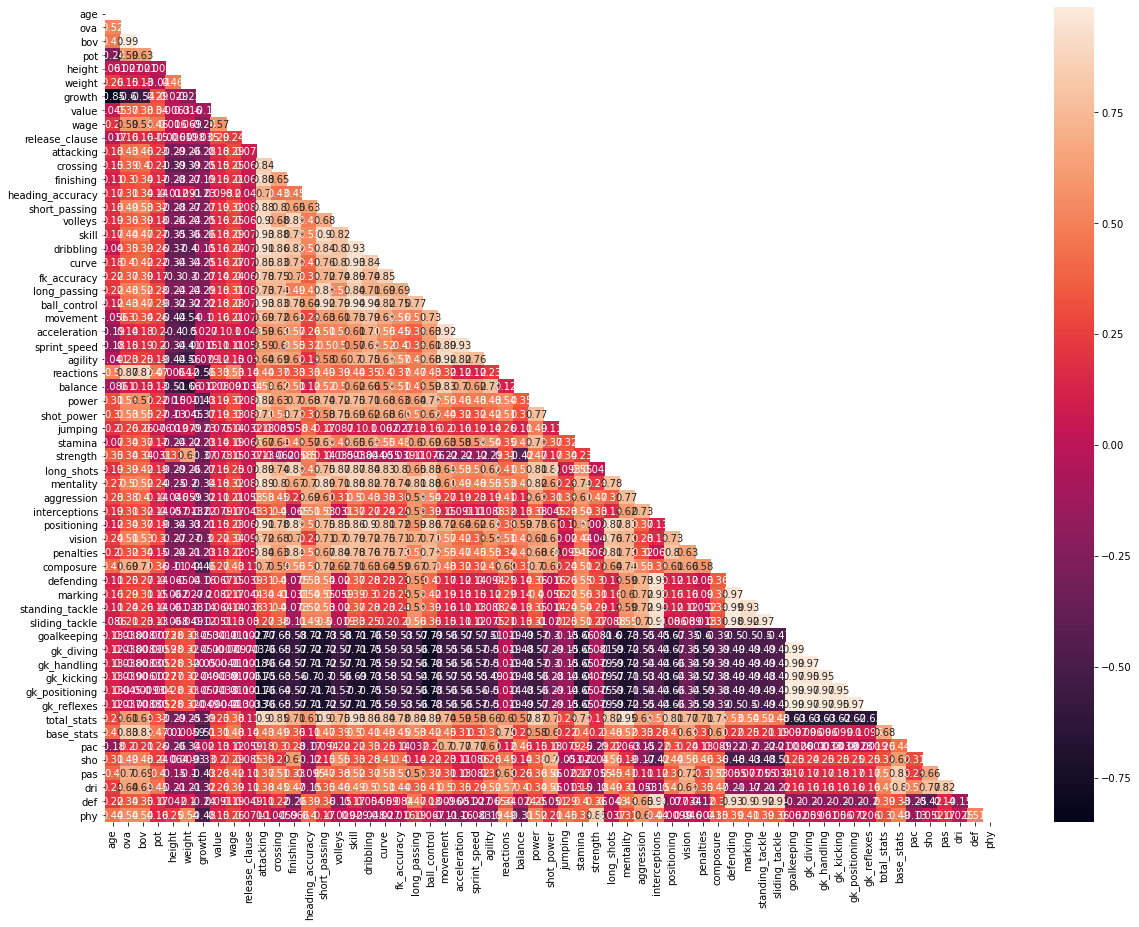

In [20]:
# Check correlation
numerical = data.select_dtypes(include=np.number)

correlations_matrix = numerical.corr()
mask = np.zeros_like(correlations_matrix)

mask[np.triu_indices_from(mask)] = True 

fig, ax = plt.subplots(figsize=(20,15))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()

## Correlation : Remove 'gk' columns (low correlation)

In [21]:
#As observed, columns goalkeeping until gk_reflexer should be removed as there is -0.75 correlation
data = data.drop(['goalkeeping','gk_diving', 'gk_handling','gk_kicking','gk_positioning','gk_reflexes'], axis=1)

## Boxplot 

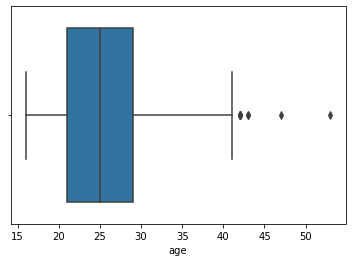

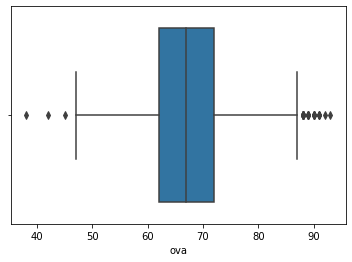

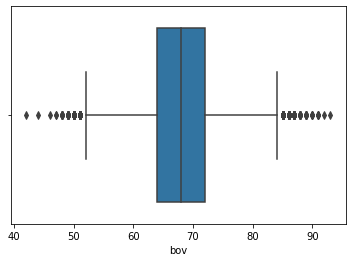

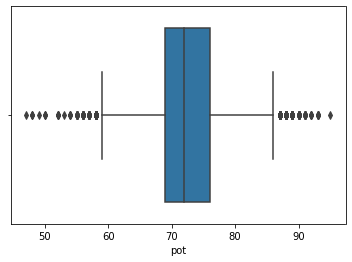

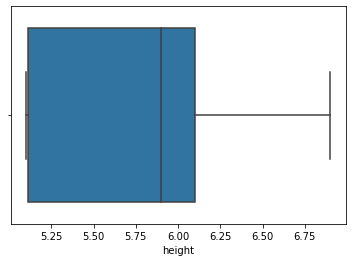

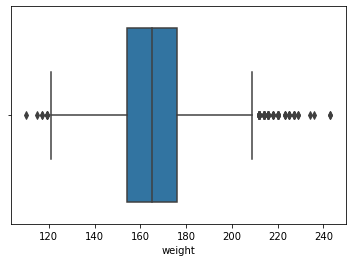

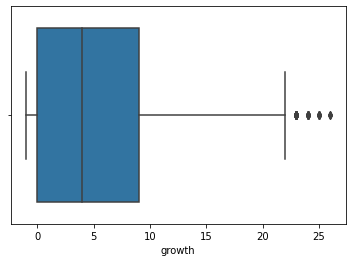

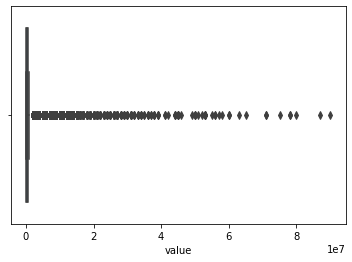

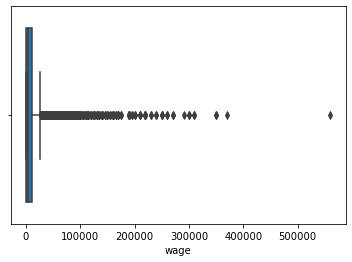

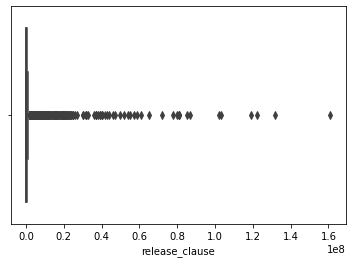

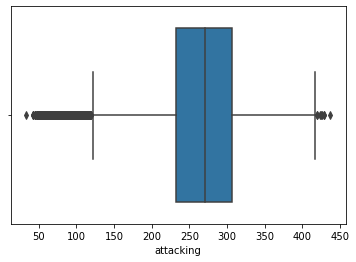

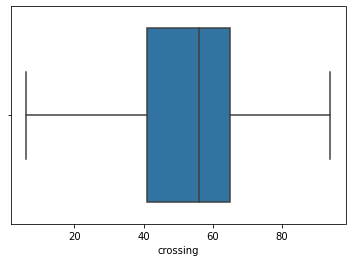

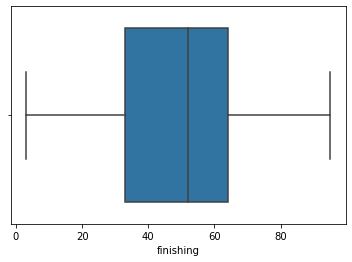

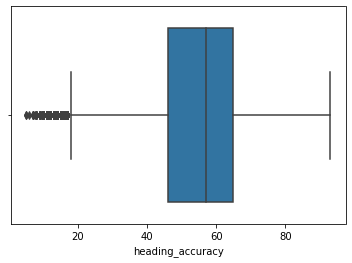

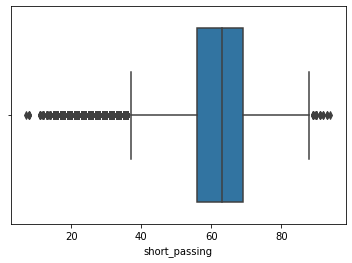

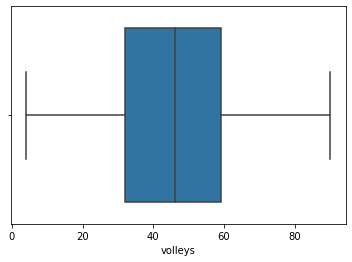

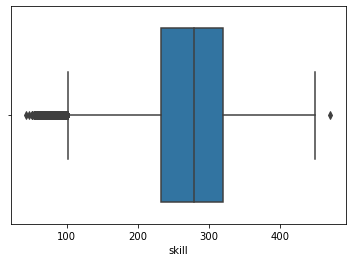

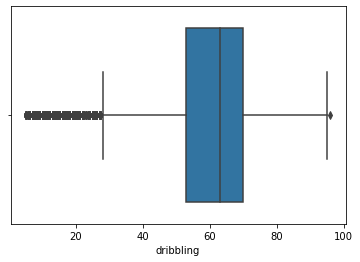

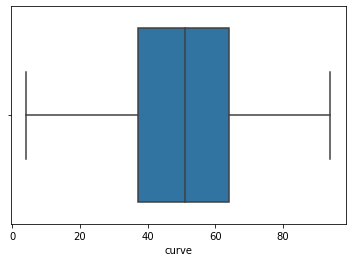

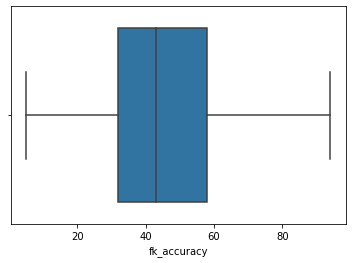

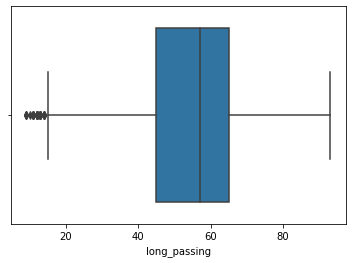

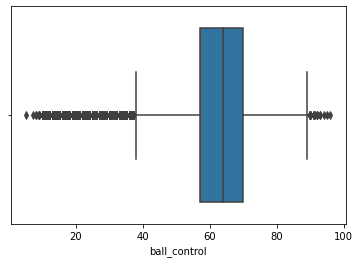

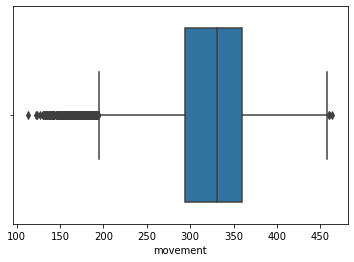

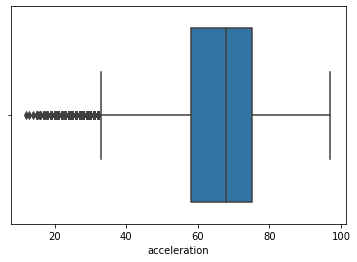

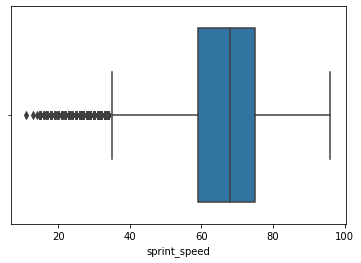

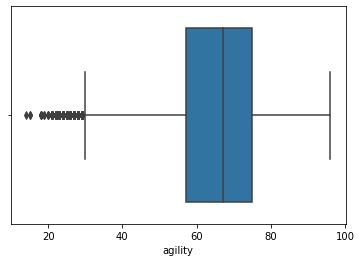

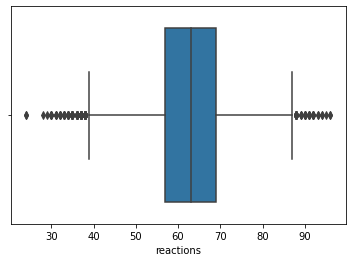

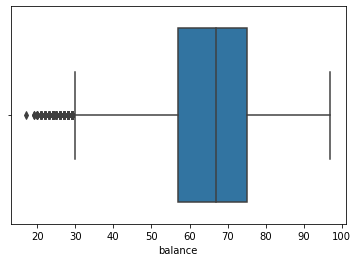

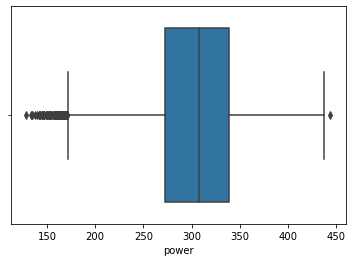

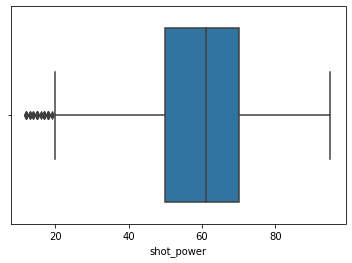

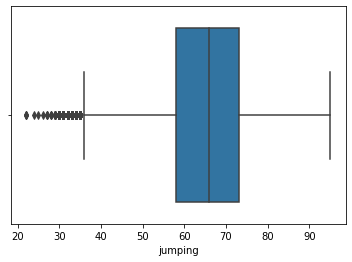

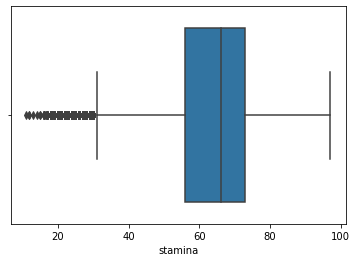

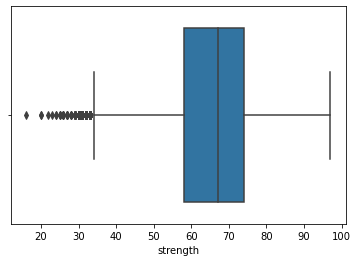

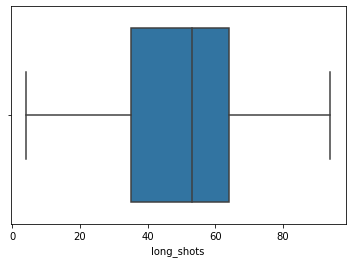

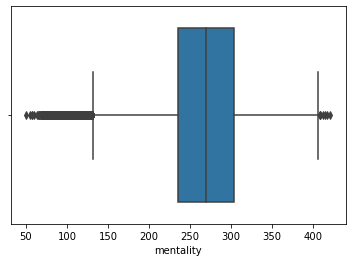

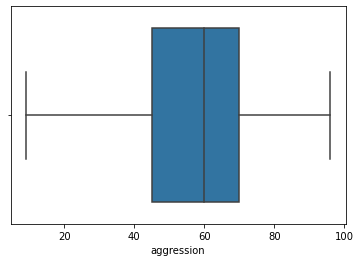

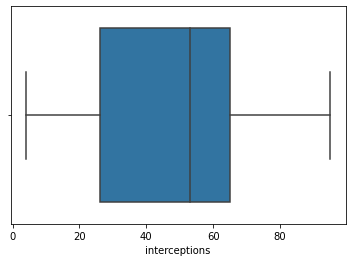

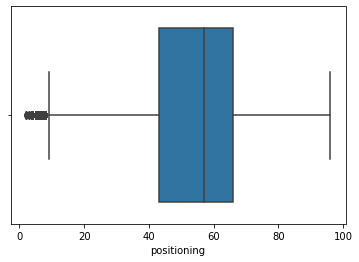

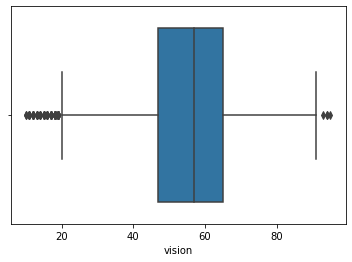

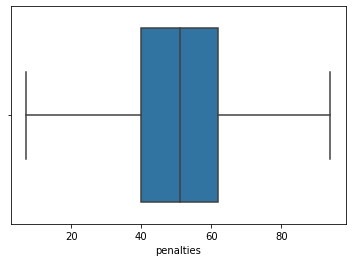

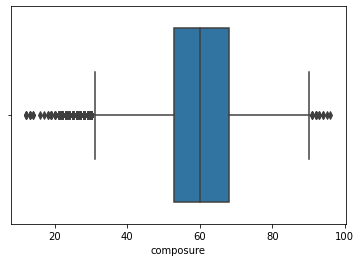

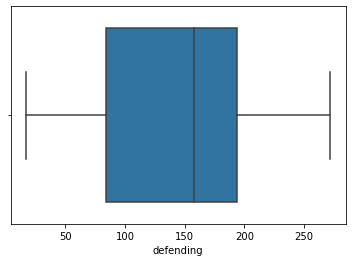

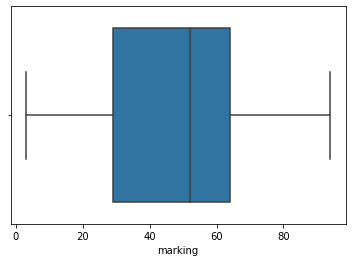

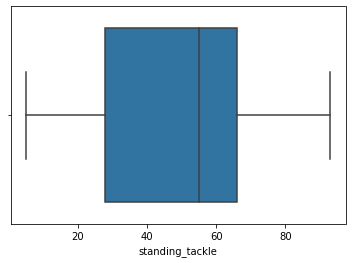

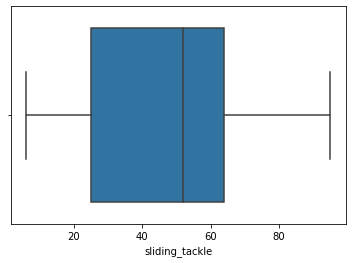

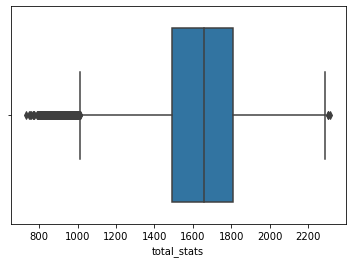

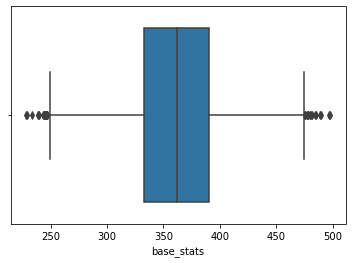

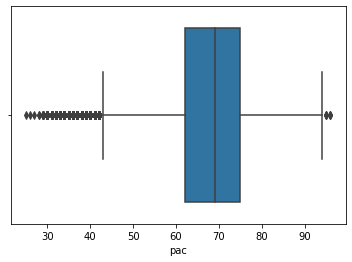

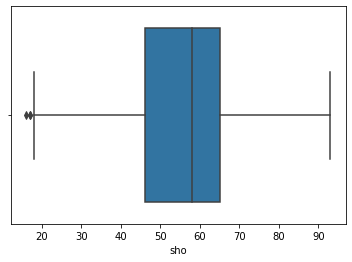

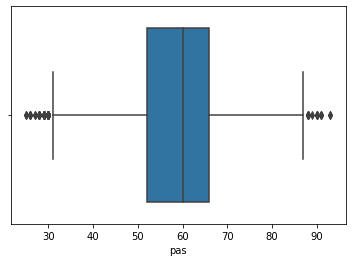

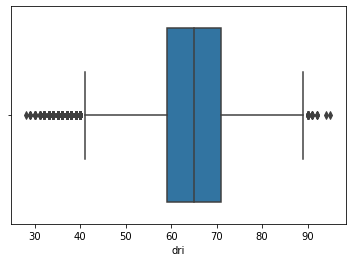

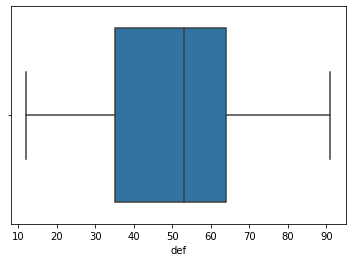

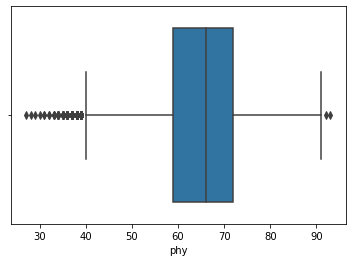

In [22]:
numerical = data.select_dtypes(include=np.number)
for x in numerical:
    sns.boxplot(x = numerical[x]) 
    plt.show()

## Remove outliers

In [23]:
#Remove outliers
def remove_outliers(data, threshold=1.5, in_columns=numerical.columns, skip_columns=['bp']): #skipping the column as its categorical
    for column in in_columns:
        if column not in skip_columns:
            upper = np.percentile(data[column],75)
            lower = np.percentile(data[column],25)
            iqr = upper - lower
            upper_limit = upper + (threshold * iqr)
            lower_limit = lower - (threshold * iqr)
            data = data[(data[column]>lower_limit) & (data[column]<upper_limit)]
    return data

In [24]:
outliers = remove_outliers(data, threshold=1.5, in_columns=['value'])

## Get dummies

In [25]:
encoded = pd.get_dummies(outliers, drop_first=True)

## Linear regression model

In [26]:
y = encoded['value']
X = encoded.drop(['value'], axis=1)

In [27]:
X_num = X.select_dtypes(include = np.number)
X_cat = X.select_dtypes(include = np.object)

In [28]:
transformer = Normalizer()
transformer.fit(X_num)
x_normalized = transformer.transform(X_num)
pd.DataFrame(x_normalized)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65
0,0.004504,0.009417,0.009690,0.009417,0.000819,0.024701,0.000000,0.955303,0.000000,0.042716,0.010235,0.006824,0.008052,0.009690,0.007915,0.046128,0.009962,0.008871,0.008188,0.009417,0.009690,0.047356,0.009280,0.010099,0.009280,0.009417,0.009280,0.047356,0.010099,0.009280,0.009417,0.009280,0.009280,0.043671,0.009826,0.009417,0.008598,0.009007,0.006824,0.008180,0.028386,0.009553,0.009417,0.009417,0.263254,0.055681,0.009690,0.008052,0.009553,0.009690,0.009280,0.009417,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000136,0.000000,0.0,0.0,0.0,0.000000
1,0.005055,0.009700,0.009563,0.009700,0.000697,0.019537,0.000000,0.956339,0.000150,0.046041,0.009290,0.008744,0.008334,0.010383,0.009290,0.050413,0.009427,0.010793,0.010793,0.009700,0.009700,0.041669,0.007651,0.006831,0.008470,0.008880,0.009837,0.044265,0.010246,0.007377,0.008744,0.008197,0.009700,0.049456,0.009700,0.009700,0.009837,0.009973,0.010246,0.010793,0.020903,0.009563,0.005875,0.005465,0.260398,0.052599,0.007241,0.009427,0.009973,0.009427,0.007924,0.008607,0.000000,0.0,0.0,0.000137,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000
2,0.002181,0.004692,0.004692,0.004692,0.000390,0.010640,0.000000,0.991269,0.000000,0.022271,0.005287,0.004229,0.002709,0.005089,0.004956,0.025575,0.005221,0.005551,0.005089,0.004560,0.005155,0.019495,0.003172,0.002776,0.004692,0.003899,0.004956,0.018768,0.004758,0.003833,0.001916,0.003701,0.004560,0.020949,0.004560,0.002577,0.004560,0.004890,0.004362,0.003961,0.006542,0.002313,0.002247,0.001983,0.116970,0.023394,0.002974,0.004494,0.005022,0.005089,0.002379,0.003436,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000
3,0.023096,0.043625,0.044908,0.052607,0.003278,0.105855,0.008982,0.000000,0.000000,0.169368,0.034643,0.044908,0.038493,0.051324,0.028873,0.163594,0.043625,0.031804,0.029511,0.041059,0.049399,0.112912,0.037851,0.039776,0.041445,0.035285,0.041518,0.153329,0.040417,0.041810,0.032719,0.042342,0.037851,0.173858,0.037851,0.044908,0.046191,0.035570,0.044908,0.038455,0.048116,0.021812,0.026303,0.029575,0.864801,0.236730,0.039134,0.042342,0.042342,0.044267,0.030153,0.038493,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000642
4,0.002948,0.006633,0.006715,0.006633,0.000467,0.012283,0.000000,0.982630,0.000590,0.030052,0.006141,0.005650,0.004422,0.007370,0.006469,0.033409,0.006960,0.006551,0.005732,0.006797,0.007370,0.028333,0.004995,0.004586,0.006469,0.006141,0.006141,0.024320,0.005486,0.003275,0.004749,0.005077,0.005732,0.030298,0.004749,0.005732,0.006387,0.007615,0.005814,0.007288,0.014821,0.005568,0.004667,0.004586,0.164918,0.034392,0.004749,0.005732,0.006960,0.006960,0.005159,0.004831,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15636,0.008704,0.025320,0.026111,0.027298,0.002611,0.065278,0.001978,0.791250,0.000000,0.077938,0.013847,0.009099,0.026111,0.018594,0.010286,0.076356,0.017407,0.010286,0.013056,0.013451,0.022155,0.096137,0.020572,0.021759,0.018199,0.018990,0.016616,0.110379,0.018990,0.027694,0.023342,0.029276,0.011077,0.086246,0.027298,0.022946,0.009099,0.011473,0.015429,0.018199,0.078334,0.024133,0.028089,0.026111,0.540819,0.119479,0.021364,0.011869,0.014638,0.018990,0.025320,0.027298,0.000396,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000
15637,0.000066,0.000205,0.000212,0.000242,0.000019,0.000623,0.000037,0.010988,0.999920,0.000908,0.000183,0.000157,0.000183,0.000234,0.000150,0.000967,0.000209,0.000154,0.000183,0.000223,0.000198,0.001091,0.000223,0.000231,0.000190,0.

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=40)

In [30]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [31]:
predictions = model.predict(X_test)

In [32]:
r2_score(y_test, predictions), mean_absolute_error(y_test, predictions), mean_squared_error(y_test, predictions, squared=False)

(0.09016878118012184, 255329.17885671914, 301461.22032824124)